# import libraries

In [5]:
import os
import pandas as pd
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"     
plt.rcParams["font.size"] = 14                   
plt.rcParams["xtick.direction"] = "in"             
plt.rcParams["ytick.direction"] = "in"             
plt.rcParams["xtick.minor.visible"] = True         
plt.rcParams["ytick.minor.visible"] = True          
plt.rcParams["xtick.major.width"] = 1.0             
plt.rcParams["ytick.major.width"] = 1.0             

plt.rcParams["xtick.minor.width"] = 1.0             
plt.rcParams["ytick.minor.width"] = 1.0             
plt.rcParams["xtick.major.size"] = 10               
plt.rcParams["ytick.major.size"] = 10               
plt.rcParams["xtick.minor.size"] = 5                
plt.rcParams["ytick.minor.size"] = 5                
plt.rcParams['xtick.top'] = False                  
plt.rcParams['ytick.right'] = False                 
plt.rcParams["axes.linewidth"] = 1.0                

plt.rcParams["legend.fancybox"] = False 
plt.rcParams["legend.framealpha"] = 1 
plt.rcParams["legend.edgecolor"] = 'black' 
plt.rcParams["legend.handlelength"] = 1 
plt.rcParams["legend.labelspacing"] = 5. 
plt.rcParams["legend.handletextpad"] = 3.
plt.rcParams["legend.markerscale"] = 2

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# PR curve for each classifier

EfficientNetB4:0.9889541831221735
ResNet152:0.9653323702999822
DenseNet201:0.983009932933405
InceptionV3:0.9400195340288862


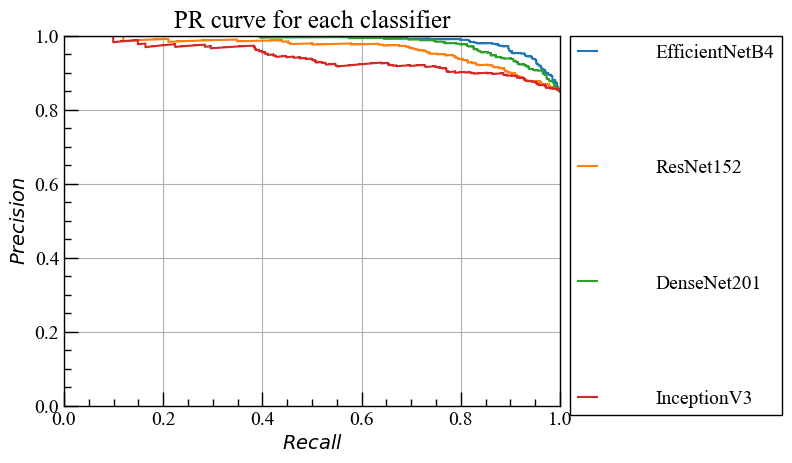

In [6]:
#-----------------------------------------------------#
#                   Configurations                    #
#-----------------------------------------------------#
# Define mode of predictions to utilize
k_fold = 5

# ["simple", "augmenting"]
mode = "simple"

# Provide pathes to prediction dat 　a
path_preds = "../../preds"

# Provide path to ensemble model directory
path_modeldir = os.path.join("../../models", "../../ensemble")

# Define label columns
cols = ["Disease_Risk", "DR", "ARMD", "MH", "DN", "MYA", "BRVO", "TSLN", "ERM",
        "LS", "MS", "CSR", "ODC", "CRVO", "TV", "AH", "ODP", "ODE", "ST",
        "AION", "PT", "RT", "RS", "CRS", "EDN", "RPEC", "MHL", "RP", "OTHER"]

classifier = ["EfficientNetB4","ResNet152","DenseNet201","InceptionV3"]

for i in range(len(classifier)):
    dt_pred = None
    for pred_file in sorted(os.listdir(path_preds)):
        if not pred_file.split(".")[1] == classifier[i]:continue
        if not pred_file.split(".")[3] == "inference" : continue
        if not pred_file.split(".")[4] == mode : continue
        # Load label prediction
        pred = pd.read_csv(os.path.join(path_preds, pred_file), sep=",", header=0)
        # Rename columns
        prefix = ".".join(pred_file.split(".")[0:3])
        label_cols = list(pred.columns[1:])
        label_cols = [prefix + "." + label for label in label_cols]
        pred.columns = ["ID"] + label_cols

        pred = pred.filter(regex="(ID|RP$)",axis = 1)

        # Merge predictions
        if dt_pred is None : dt_pred = pred
        else : dt_pred = dt_pred.merge(pred, on="ID")
    dt_pred["RP"] = 0
    dt_pred["RP"] = dt_pred.iloc[:,1:5].mean(axis = 1)


    name = "classifier."+classifier[i]+".inference." + mode
    
    df_processed = dt_pred.filter(items=['ID','RP'])
    df_processed = df_processed.sort_values('ID')
    df_processed

    df_answer = pd.read_csv("../../storage/data_Labels.csv")
    df_answer_processed = df_answer.filter(items=['ID','RP'])
    df_answer_processed = df_answer_processed.sort_values('ID')
    df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
    df_probability.to_csv("PR_AUC_"+name+".csv",index = False)

    df_list = df_processed["RP"].values.tolist()
    df_answer_list = df_answer_processed["RP"].values.tolist()
    roc = precision_recall_curve(df_answer_list,df_list)
    presicion, recall, thresholds = roc

    plt.plot(recall, presicion, marker=',',label=classifier[i])
    print(classifier[i]+":"+str(average_precision_score(df_answer_list,df_list,average="micro")))


plt.xlabel(r"$Recall$")
plt.ylabel(r"$Precision$")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
plt.title("PR curve for each classifier",fontsize=18)
plt.savefig('PR_curve.'+mode+'.pdf', bbox_inches="tight", pad_inches=0.05)

# PR curve for each classifier(augumenting)

EfficientNetB4:0.9888147146804553
ResNet152:0.9738720493235183
DenseNet201:0.990724876136429
InceptionV3:0.9519552322223345


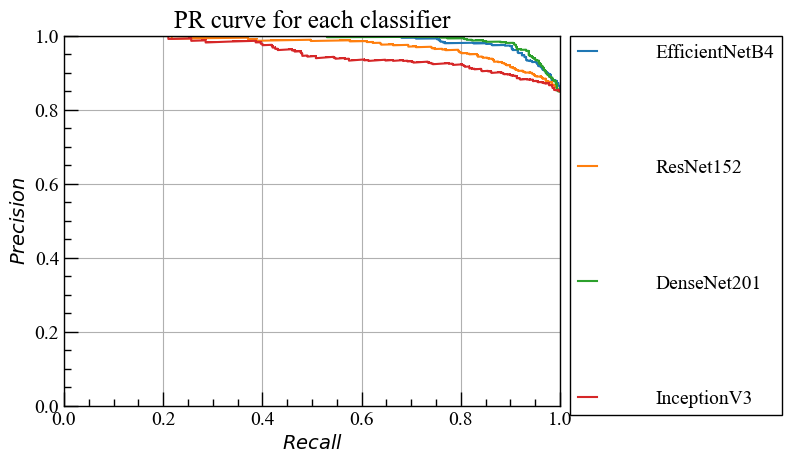

In [7]:
#-----------------------------------------------------#
#                   Configurations                    #
#-----------------------------------------------------#
# Define mode of predictions to utilize
k_fold = 5

# ["simple", "augmenting"]
mode = "augmenting"

# Provide pathes to prediction data
path_preds = "../../preds"

# Provide path to ensemble model directory
path_modeldir = os.path.join("../../models", "../../ensemble")

# Define label columns
cols = ["Disease_Risk", "DR", "ARMD", "MH", "DN", "MYA", "BRVO", "TSLN", "ERM",
        "LS", "MS", "CSR", "ODC", "CRVO", "TV", "AH", "ODP", "ODE", "ST",
        "AION", "PT", "RT", "RS", "CRS", "EDN", "RPEC", "MHL", "RP", "OTHER"]

classifier = ["EfficientNetB4","ResNet152","DenseNet201","InceptionV3"]

for i in range(len(classifier)):
    dt_pred = None
    for pred_file in sorted(os.listdir(path_preds)):
        if not pred_file.split(".")[1] == classifier[i]:continue
        if not pred_file.split(".")[3] == "inference" : continue
        if not pred_file.split(".")[4] == mode : continue
        # Load label prediction
        pred = pd.read_csv(os.path.join(path_preds, pred_file), sep=",", header=0)
        # Rename columns
        prefix = ".".join(pred_file.split(".")[0:3])
        label_cols = list(pred.columns[1:])
        label_cols = [prefix + "." + label for label in label_cols]
        pred.columns = ["ID"] + label_cols

        pred = pred.filter(regex="(ID|RP$)",axis = 1)

        # Merge predictions
        if dt_pred is None : dt_pred = pred
        else : dt_pred = dt_pred.merge(pred, on="ID")
    dt_pred["RP"] = 0
    dt_pred["RP"] = dt_pred.iloc[:,1:5].mean(axis = 1)


    name = "classifier."+classifier[i]+".inference." + mode
    
    df_processed = dt_pred.filter(items=['ID','RP'])
    df_processed = df_processed.sort_values('ID')
    df_processed

    df_answer = pd.read_csv("../../storage/data_Labels.csv")
    df_answer_processed = df_answer.filter(items=['ID','RP'])
    df_answer_processed = df_answer_processed.sort_values('ID')
    df_probability = pd.merge(df_answer_processed,df_processed, how='left',on =  "ID")
    df_probability.to_csv("PR_AUC_"+name+".csv",index = False)

    df_list = df_processed["RP"].values.tolist()
    df_answer_list = df_answer_processed["RP"].values.tolist()
    roc = precision_recall_curve(df_answer_list,df_list)
    presicion, recall, thresholds = roc
    plt.plot( recall, presicion,marker=',',label=classifier[i])
    print(classifier[i]+":"+str(average_precision_score(df_answer_list,df_list,average="micro")))


plt.xlabel(r"$Recall$")
plt.ylabel(r"$Precision$")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()

plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
plt.title("PR curve for each classifier",fontsize=18)
plt.savefig('PR_curve.'+mode+'.pdf', bbox_inches="tight", pad_inches=0.05)